In [1]:
# TODOs
# improve DI calc
# standardize workflow

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.utils import resample

### Read data

In [3]:
df = pd.read_csv('../../../data/allstate-main.csv')

In [4]:
df.head()

territory gender  birthdate  ypc  current_premium  indicated_premium  \
0        601      M  10/5/1947    0           863.97             830.58   
1        601      F   7/6/1953    0           828.63             611.14   
2        601      M  4/18/1956    0          1000.59             593.99   
3        601      F  8/16/1956    0           700.42             547.95   
4        601      F  1/23/1957    0           505.92             448.33   

   selected_premium  underlying_premium  fixed_expenses  \
0            862.57              673.06          175.98   
1            826.43              612.75          175.98   
2            996.60              858.20          175.98   
3            697.84              571.49          180.48   
4            504.56              333.71          152.08   

   underlying_total_premium  ...  population perc_nonwhite majority_minority  \
0                    849.04  ...       24233     58.758717              True   
1                    788.73  ...       24233     58.758717              True   
2                   1034.18  ...       24233     58.758717              True   
3                    751.97  ...       24233     58.758717              True   
4                    485.79  ...       24233     58.758717              True   

         age  change_in_premium age_  risk_group  risk_group_0  risk_group_1  \
0  73.107593              -1.40   73           0             1             0   
1  67.355250              -2.20   67           0             1             0   
2  64.570799              -3.99   65           0             1             0   
3  64.242250              -2.58   64           0             1             0   
4  63.804185              -1.36   64           0             1             0   

   perc_change_in_premium  
0               -0.162043  
1               -0.265498  
2               -0.398765  
3               -0.368350  
4               -0.268817  

[5 rows x 28 columns]

In [5]:
df.shape

(92786, 28)

In [6]:
df.head()

territory gender  birthdate  ypc  current_premium  indicated_premium  \
0        601      M  10/5/1947    0           863.97             830.58   
1        601      F   7/6/1953    0           828.63             611.14   
2        601      M  4/18/1956    0          1000.59             593.99   
3        601      F  8/16/1956    0           700.42             547.95   
4        601      F  1/23/1957    0           505.92             448.33   

   selected_premium  underlying_premium  fixed_expenses  \
0            862.57              673.06          175.98   
1            826.43              612.75          175.98   
2            996.60              858.20          175.98   
3            697.84              571.49          180.48   
4            504.56              333.71          152.08   

   underlying_total_premium  ...  population perc_nonwhite majority_minority  \
0                    849.04  ...       24233     58.758717              True   
1                    788.73  ...       24233     58.758717              True   
2                   1034.18  ...       24233     58.758717              True   
3                    751.97  ...       24233     58.758717              True   
4                    485.79  ...       24233     58.758717              True   

         age  change_in_premium age_  risk_group  risk_group_0  risk_group_1  \
0  73.107593              -1.40   73           0             1             0   
1  67.355250              -2.20   67           0             1             0   
2  64.570799              -3.99   65           0             1             0   
3  64.242250              -2.58   64           0             1             0   
4  63.804185              -1.36   64           0             1             0   

   perc_change_in_premium  
0               -0.162043  
1               -0.265498  
2               -0.398765  
3               -0.368350  
4               -0.268817  

[5 rows x 28 columns]

### Make assumptions

In [7]:
# all policyholders are unique in effect ignoring policyholders w/ same birthdate and gender

In [8]:
pd.set_option('min_rows', 100)
pd.set_option('display.max_columns', 50)

### Features engineering

#### Convert premium to int

In [9]:
df['current_premium_int'] = df['current_premium'].round().astype(int)

<AxesSubplot:>

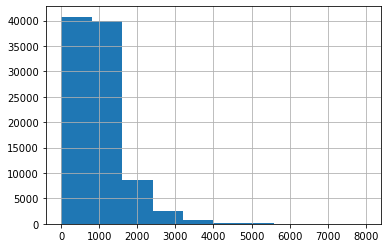

In [10]:
df['current_premium_int'].hist()

#### Convert age into categorical variables

In [11]:
df['age_'].describe()

count    92786.000000
mean        55.386093
std         15.033386
min         24.000000
25%         43.000000
50%         55.000000
75%         66.000000
max        121.000000
Name: age_, dtype: float64

<AxesSubplot:>

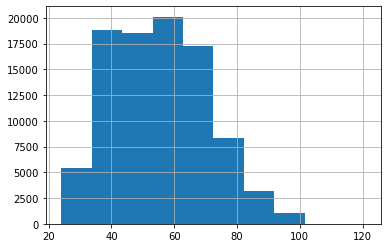

In [12]:
df['age_'].hist()

In [13]:
df['age_group'] = pd.cut(df['age_'], bins=[20,40,60,80,100,150], labels=['young', 'middle-aged', 'senior',
                                                                        'retired', 'old'])

In [14]:
df = pd.concat([df, pd.get_dummies(df['age_group'], drop_first=False)], axis=1)

#### Add male, female

In [15]:
df = pd.concat([df, pd.get_dummies(df['gender'], drop_first=False)], axis=1)
df.rename(columns={'F':'female', 'M':'male'}, inplace=True)

#### Add ypc dummies

In [16]:
df = pd.concat([df, pd.get_dummies(df['ypc'], prefix='ypc')], axis=1)

#### Add minority

In [17]:
df['majority_minority'] = df['majority_minority'] * 1

In [18]:
df.rename(columns={'majority_minority':'minority'}, inplace=True)

In [19]:
df.head()

territory gender  birthdate  ypc  current_premium  indicated_premium  \
0        601      M  10/5/1947    0           863.97             830.58   
1        601      F   7/6/1953    0           828.63             611.14   
2        601      M  4/18/1956    0          1000.59             593.99   
3        601      F  8/16/1956    0           700.42             547.95   
4        601      F  1/23/1957    0           505.92             448.33   

   selected_premium  underlying_premium  fixed_expenses  \
0            862.57              673.06          175.98   
1            826.43              612.75          175.98   
2            996.60              858.20          175.98   
3            697.84              571.49          180.48   
4            504.56              333.71          152.08   

   underlying_total_premium  cgr_factor  cgr   county  county_code  zipcode  \
0                    849.04        1.02  ZHK  CHARLES            8    20601   
1                    788.73        1.06  6NS  CHARLES            8    20601   
2                   1034.18        0.96  Z2D  CHARLES            8    20601   
3                    751.97        0.91  D7G  CHARLES            8    20601   
4                    485.79        1.06  3YN  CHARLES            8    20601   

      town  area  GEO.id2  population  perc_nonwhite  minority        age  \
0  WALDORF   210    20601       24233      58.758717         1  73.107593   
1  WALDORF   210    20601       24233      58.758717         1  67.355250   
2  WALDORF   210    20601       24233      58.758717         1  64.570799   
3  WALDORF   210    20601       24233      58.758717         1  64.242250   
4  WALDORF   210    20601       24233      58.758717         1  63.804185   

   change_in_premium  age_  risk_group  risk_group_0  risk_group_1  \
0              -1.40    73           0             1             0   
1              -2.20    67           0             1             0   
2              -3.99    65           0             1             0   
3              -2.58    64           0             1             0   
4              -1.36    64           0             1             0   

   perc_change_in_premium  current_premium_int age_group  young  middle-aged  \
0               -0.162043                  864    senior      0            0   
1               -0.265498                  829    senior      0            0   
2               -0.398765                 1001    senior      0            0   
3               -0.368350                  700    senior      0            0   
4               -0.268817                  506    senior      0            0   

   senior  retired  old  female  male  ypc_0  ypc_1  ypc_2  ypc_3  ypc_4  \
0       1        0    0       0     1      1      0      0      0      0   
1       1        0    0       1     0      1      0      0      0      0   
2       1        0    0       0     1      1      0      0      0      0   
3       1        0    0       1     0      1      0      0      0      0   
4       1        0    0       1     0      1      0      0      0      0   

   ypc_5  
0      0  
1      0  
2      0  
3      0  
4      0

### Create modelling dataset

In [20]:
df.shape

(92786, 43)

In [21]:
# TODO
# propercase for orig variable name
# lowercase for variable classes
dataset = df[['current_premium', 'risk_group', 'young', 'middle-aged', 'senior', 'retired', 'old', 'female', 'male', 'ypc_0', 'ypc_1', 'ypc_2', 'ypc_3', 'ypc_4', 'ypc_5', 'minority']].copy()

#### Upsample risk group=1

In [22]:
dataset.shape

(92786, 16)

In [23]:
sns.reset_orig()

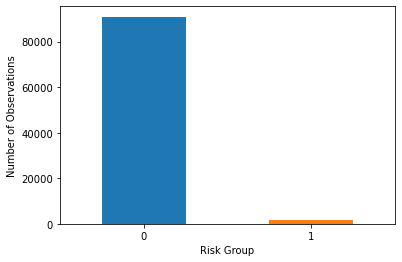

In [24]:
dataset['risk_group'].value_counts().plot(kind='bar', color=['tab:blue', 'tab:orange'])
plt.xticks(rotation=0)
plt.xlabel('Risk Group')
plt.ylabel('Number of Observations')
plt.show()

In [25]:
dataset_riskgrp0 = dataset[dataset['risk_group'] == 0].copy()

In [26]:
dataset_riskgrp1 = dataset[dataset['risk_group'] == 1].copy()

In [27]:
dataset_riskgrp1_rs = resample(dataset_riskgrp1, replace=True, n_samples=90951, random_state=786)

In [28]:
dataset = dataset_riskgrp0.append(dataset_riskgrp1_rs)

In [29]:
dataset['risk_group'].value_counts()

1    90951
0    90951
Name: risk_group, dtype: int64

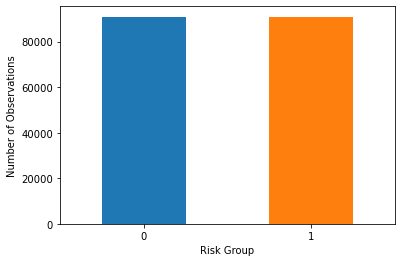

In [30]:
dataset['risk_group'].value_counts().plot(kind='bar', color=['tab:blue', 'tab:orange'])
plt.xticks(ticks=[0,1], labels=('0', '1'), rotation=0)
plt.xlabel('Risk Group')
plt.ylabel('Number of Observations')
plt.show()

In [31]:
dataset.groupby(['male', 'risk_group'])['risk_group'].count()

male  risk_group
0     0             38883
      1             33092
1     0             52068
      1             57859
Name: risk_group, dtype: int64

In [32]:
dataset.groupby(['minority', 'risk_group'])['risk_group'].count()

minority  risk_group
0         0               280
          1               148
1         0             90671
          1             90803
Name: risk_group, dtype: int64

### Mitigate data biases

In [33]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer

from aif360.algorithms.preprocessing.reweighing import Reweighing

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from IPython.display import Markdown, display
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import json

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[LFR]'


In [34]:
# TODO: play with protected attribute
orig_dataset = BinaryLabelDataset(df=dataset, label_names=['risk_group'], 
                             protected_attribute_names=['male', 'middle-aged', 'ypc_1', 'minority'],
                             favorable_label=0, unfavorable_label=1)

In [35]:
# 70:30 split into train, test
# 50:50 split of test into valid, test
dataset_train, dataset_vt = orig_dataset.split([0.7], shuffle=True)
dataset_valid, dataset_test = dataset_vt.split([0.5], shuffle=True)

In [36]:
# print out some labels, names, etc.
display(Markdown("#### Training Dataset shape"))
print(dataset_train.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(dataset_train.favorable_label, dataset_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(dataset_train.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(dataset_train.privileged_protected_attributes, 
      dataset_train.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(dataset_train.feature_names)

#### Training Dataset shape

(127331, 15)


#### Favorable and unfavorable labels

0.0 1.0


#### Protected attribute names

['male', 'middle-aged', 'ypc_1', 'minority']


#### Privileged and unprivileged protected attribute values

[array([1.]), array([1.]), array([1.]), array([1.])] [array([0.]), array([0.]), array([0.]), array([0.])]


#### Dataset feature names

['current_premium', 'young', 'middle-aged', 'senior', 'retired', 'old', 'female', 'male', 'ypc_0', 'ypc_1', 'ypc_2', 'ypc_3', 'ypc_4', 'ypc_5', 'minority']


In [37]:
def make_results_table(results, list_of_vars):

    def expand_metric(df, metric, list_of_vars):
        # expand dictionary column into dataframe
        df = df[metric].apply(pd.Series)
        df['name'] = list_of_vars
        # get metric value
        df['message'] = df['message'].astype(str)
        df[metric] = df['message'].apply(lambda x: x.split(':')[1])
        # keep relevant columns
        df = df[['name', metric]].copy()
        df[metric] = df[metric].astype(float).round(2)
        return df
    
    # convert json into dataframe
    df_results = pd.DataFrame.from_dict(results, orient='index').reset_index().rename(columns={'index':'Feature', 
                                                                                               0:'Mean Difference',
                                                                                               1: 'Disparate Impact',
                                                                                               2: 'Consistency'})
    # get column names
    list_of_metrics = df_results.columns[1:].tolist()
    df0 = pd.DataFrame(np.zeros((len(list_of_vars), 1)))
    
    for metric in list_of_metrics:
        df = expand_metric(df_results, metric, list_of_vars)
        df0 = pd.concat([df0,df], axis=1)
    
    # get variable names
    vars_col = df0['name'].iloc[:,0]
    df0.drop(columns=['name', 0], inplace=True)
    df0['Name'] = vars_col
    df0 = df0[['Name', 'Mean Difference', 'Disparate Impact', 'Consistency']].copy()
    return df0


def get_fairness_metrics(dataset):
    # NOTE: dataset expected to a BinaryLabelDataset
    results = {}
    list_of_vars = []
    
    for var in dataset.protected_attribute_names:
        privileged_groups = []
        unprivileged_groups = []

        privileged_groups.append({var: 0})
        unprivileged_groups.append({var: 1})

        metrics = BinaryLabelDatasetMetric(dataset,
                                           unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)


        json_explainer = MetricJSONExplainer(metrics)
        
        mean_diff = json.loads(json_explainer.mean_difference())
        di = json.loads(json_explainer.disparate_impact())
        # NOTE: json_explainer.consistency() has a bug (https://github.com/Trusted-AI/AIF360/issues/227)
        consist = metrics.consistency(n_neighbors=5)[0]
        # create array to manage around bug in source code
        consist_d = {'metric': 'Consistency',
                     'message': 'Consistency (measures how similar labels are for similar instances): '+str(consist)}

        results[var] = [mean_diff, di, consist_d]
        list_of_vars.append(var)
        
    df = make_results_table(results, list_of_vars)
    return df

### Fairness metrics

In [38]:
display(Markdown("#### Group Fairness"))
display(Markdown("#### I. Mean Difference (or Statistical Parity Difference)"))
display(Markdown("$Pr(Risk Group=0|D=Female) − Pr(Risk Group=0|D=Male)$"))
display(Markdown("#### II. Disparate Impact on unprivileged groups"))
display(Markdown("$\\frac{Pr(Y=1|D=unprivileged)}{Pr(Y=1|D=privileged)}$"))
display(Markdown("#### Individual Fairness"))
display(Markdown("#### I. Consistency"))
display(Markdown("$1 − \\frac{1}{n \cdot n\_neighbors} \sum_{i=1}^{n}|\hat{y}_i − \sum_{j \epsilon \eta_{n\_neighbors}(x_i)} \hat{y}_j|$"))

#### Group Fairness

#### I. Mean Difference (or Statistical Parity Difference)

$Pr(Risk Group=0|D=Female) − Pr(Risk Group=0|D=Male)$

#### II. Disparate Impact on unprivileged groups

$\frac{Pr(Y=1|D=unprivileged)}{Pr(Y=1|D=privileged)}$

#### Individual Fairness

#### I. Consistency

$1 − \frac{1}{n \cdot n\_neighbors} \sum_{i=1}^{n}|\hat{y}_i − \sum_{j \epsilon \eta_{n\_neighbors}(x_i)} \hat{y}_j|$

### Get baseline for each protected attribute

In [39]:
get_fairness_metrics(dataset_train)

Name  Mean Difference  Disparate Impact  Consistency
0         male            -0.07              0.88         0.99
1  middle-aged            -0.10              0.81         0.99
2        ypc_1            -0.01              0.98         0.99
3     minority            -0.15              0.77         0.99

In [40]:
# %%timeit

# get_fairness_metrics(dataset_train)

In [41]:
# mean_diff_results = mean_diffs[mean_diffs['name'].isin(['Female', 'young', 'retired', 'minority'])].copy()

In [42]:
# change file name
# mean_diffs.to_csv('mean_diffs.csv', index=False)

### Reweigh dataset with different order

In [43]:
def reweigh_dataset(privileged_groups, unprivileged_groups, dataset):
    # NOTE: dataset expected to be a BinaryLabelDataset
    privileged_groups = privileged_groups
    unprivileged_groups = unprivileged_groups

    # reweigh training dataset
    RW = Reweighing(unprivileged_groups=unprivileged_groups,
                    privileged_groups=privileged_groups)

    RW.fit(dataset)
    dataset_transformed = RW.transform(dataset)
    
    diff = dataset_transformed.instance_weights.sum() - dataset.instance_weights.sum()
    print("The difference in weights between original and transformed dataset is %s" % diff)
    
    return dataset_transformed

#### 1: Reweigh gender, race, age

1.1) Reweigh for gender

In [44]:
dataset_train.convert_to_dataframe()[0].shape

(127331, 16)

In [45]:
privileged_groups = [{'male': 0}]
unprivileged_groups = [{'male': 1}] 

In [46]:
dataset_transf_rw1 = reweigh_dataset(privileged_groups, unprivileged_groups, dataset_train)

The difference in weights between original and transformed dataset is -1.4551915228366852e-11


In [47]:
get_fairness_metrics(dataset_transf_rw1)

Name  Mean Difference  Disparate Impact  Consistency
0         male             0.00              1.00         0.99
1  middle-aged            -0.10              0.81         0.99
2        ypc_1            -0.01              0.98         0.99
3     minority            -0.15              0.77         0.99

1.2) Reweigh for race

In [48]:
# privileged is non-minority
privileged_groups = [{'minority': 0}]
unprivileged_groups = [{'minority': 1}]

In [49]:
dataset_transf_rw2 = reweigh_dataset(privileged_groups, unprivileged_groups, dataset_transf_rw1)

The difference in weights between original and transformed dataset is 1.4551915228366852e-11


In [50]:
get_fairness_metrics(dataset_transf_rw2)

Name  Mean Difference  Disparate Impact  Consistency
0         male            -0.00              1.00         0.99
1  middle-aged            -0.10              0.81         0.99
2        ypc_1            -0.01              0.97         0.99
3     minority             0.00              1.00         0.99

1.3) Reweigh for age

In [51]:
# privileged is non-minority
privileged_groups = [{'middle-aged': 0}]
unprivileged_groups = [{'middle-aged': 1}]

In [52]:
dataset_transf_rw3 = reweigh_dataset(privileged_groups, unprivileged_groups, dataset_transf_rw2)

The difference in weights between original and transformed dataset is 5.820766091346741e-11


In [53]:
get_fairness_metrics(dataset_transf_rw3)

Name  Mean Difference  Disparate Impact  Consistency
0         male            -0.00              0.99         0.99
1  middle-aged             0.00              1.00         0.99
2        ypc_1            -0.01              0.98         0.99
3     minority            -0.00              0.99         0.99

##### 2: Reweigh race, age, gender

2.1) Reweigh race

In [54]:
privileged_groups = [{'minority': 0}]
unprivileged_groups = [{'minority': 1}] 

In [55]:
dataset_transf_rw1 = reweigh_dataset(privileged_groups, unprivileged_groups, dataset_train)

The difference in weights between original and transformed dataset is 2.9103830456733704e-11


In [56]:
get_fairness_metrics(dataset_transf_rw1)

Name  Mean Difference  Disparate Impact  Consistency
0         male            -0.07              0.88         0.99
1  middle-aged            -0.10              0.81         0.99
2        ypc_1            -0.01              0.98         0.99
3     minority             0.00              1.00         0.99

2.2) Reweigh age

In [57]:
privileged_groups = [{'middle-aged': 0}]
unprivileged_groups = [{'middle-aged': 1}]

In [58]:
dataset_transf_rw2 = reweigh_dataset(privileged_groups, unprivileged_groups, dataset_transf_rw1)

The difference in weights between original and transformed dataset is 1.4551915228366852e-11


In [59]:
get_fairness_metrics(dataset_transf_rw2)

Name  Mean Difference  Disparate Impact  Consistency
0         male            -0.07              0.87         0.99
1  middle-aged             0.00              1.00         0.99
2        ypc_1            -0.01              0.98         0.99
3     minority            -0.00              0.99         0.99

2.3) Reweigh gender

In [60]:
privileged_groups = [{'male': 0}]
unprivileged_groups = [{'male': 1}]

In [61]:
dataset_transf_rw3 = reweigh_dataset(privileged_groups, unprivileged_groups, dataset_transf_rw2)

The difference in weights between original and transformed dataset is -1.4551915228366852e-11


In [62]:
get_fairness_metrics(dataset_transf_rw3)

Name  Mean Difference  Disparate Impact  Consistency
0         male             0.00              1.00         0.99
1  middle-aged            -0.00              1.00         0.99
2        ypc_1            -0.01              0.98         0.99
3     minority            -0.00              0.99         0.99

### Attempt other datasets

In [63]:
from aif360.datasets import CompasDataset, GermanDataset

### Compas dataset

In [64]:
cdataset_og = CompasDataset(protected_attribute_names=['sex', 'race'])

In [65]:
cdataset_og.metadata['protected_attribute_maps']

[{0.0: 'Male', 1.0: 'Female'}, {1.0: 'Caucasian', 0.0: 'Not Caucasian'}]

In [66]:
get_fairness_metrics(cdataset_og)

Name  Mean Difference  Disparate Impact  Consistency
0   sex             0.13              1.25         0.68
1  race             0.10              1.19         0.68

In [67]:
# female (1) is privileged, male (0) is unprivileged
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

In [68]:
cdataset_og_rw1 = reweigh_dataset(privileged_groups, unprivileged_groups, cdataset_og)

The difference in weights between original and transformed dataset is 0.0


In [69]:
get_fairness_metrics(cdataset_og_rw1)

Name  Mean Difference  Disparate Impact  Consistency
0   sex             0.00              1.00         0.68
1  race             0.09              1.17         0.68

In [70]:
# caucasian (1) is privileged, not caucasian (0) is unprivileged
privileged_groups = [{'race': 1}]
unprivileged_groups = [{'race': 0}]

In [71]:
cdataset_og_rw2 = reweigh_dataset(privileged_groups, unprivileged_groups, cdataset_og_rw1)

The difference in weights between original and transformed dataset is 0.0


In [72]:
get_fairness_metrics(cdataset_og_rw2)

Name  Mean Difference  Disparate Impact  Consistency
0   sex            -0.01              0.98         0.68
1  race            -0.00              1.00         0.68

In [73]:
# df_compas = cdataset_og_rw2.convert_to_dataframe()[0]

In [74]:
# df_compas.to_csv('../../../data/compass-transformed.csv', index=None)

### German dataset

In [75]:
dataset_og = GermanDataset(protected_attribute_names=['sex', 'age'])

In [76]:
# fix labels to be 0s and 1s
# originally, 2 = bad credit, 1 = good credit
dataset_og.labels = np.where(dataset_og.labels == 2, 0, 1)

In [77]:
dataset_og.unfavorable_label = 0.0

In [78]:
dataset_og.metadata['protected_attribute_maps']

[{1.0: 'Male', 0.0: 'Female'}, {1.0: 'Old', 0.0: 'Young'}]

In [79]:
get_fairness_metrics(dataset_og)

Name  Mean Difference  Disparate Impact  Consistency
0  sex             0.07              1.12         0.68
1  age             0.15              1.26         0.68

In [80]:
# old is privileged, young is unprivileged
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

In [81]:
dataset_og_rw1 = reweigh_dataset(privileged_groups, unprivileged_groups, dataset_og)

The difference in weights between original and transformed dataset is 0.0


In [82]:
get_fairness_metrics(dataset_og_rw1)

Name  Mean Difference  Disparate Impact  Consistency
0  sex             0.04              1.06         0.68
1  age            -0.00              1.00         0.68

In [83]:
# male is privileged, female is unprivileged
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

In [84]:
dataset_og_rw2 = reweigh_dataset(privileged_groups, unprivileged_groups, dataset_og_rw1)

The difference in weights between original and transformed dataset is -2.2737367544323206e-13


In [85]:
get_fairness_metrics(dataset_og_rw2)

Name  Mean Difference  Disparate Impact  Consistency
0  sex            -0.00              1.00         0.68
1  age            -0.01              0.98         0.68

In [86]:
# df_credit = dataset_og_rw2.convert_to_dataframe()[0]

In [87]:
# df_credit.to_csv('../../../data/german-transformed.csv', index=None)